# Lab 03 - Inteligencja roju

## Zadanie wstępne 

Użyjemy paczki pyswarms (https://pyswarms.readthedocs.io/en/latest/index.html), by
uruchomić algorytm Particle Swarm Optimizer do wyszukiwania minimum funkcji
sferycznej, która ma minimum 0 we współrzędnych (0,0) – patrz rysunki.

2023-10-28 21:30:58,010 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=4.79e-13
2023-10-28 21:30:58,060 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.788234999236362e-13, best pos: [-6.90005753e-07 -5.21110364e-08]


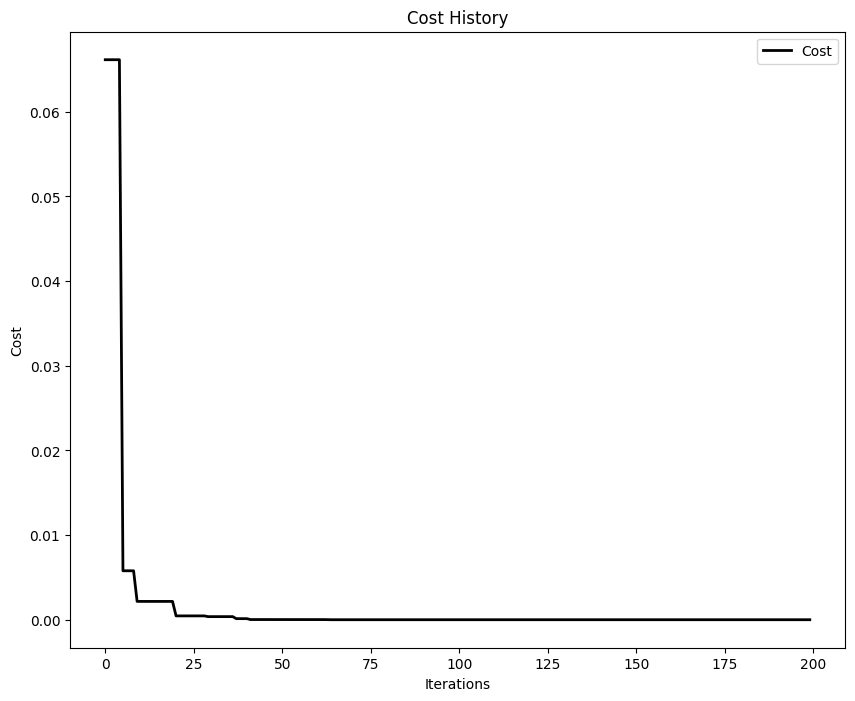

In [53]:
# Import modules
import numpy as np
from matplotlib import pyplot as plt

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history

# Set-up hyperparameters
options = {"c1": 0.5, "c2": 0.3, "w": 0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=200)
# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history
# Plot!
plot_cost_history(cost_history)
plt.show()

## Zadanie wstępne dla chętnych (z wykładu)

Ściągnij plik pso-animation.py, który tworzy animację poruszającego się roju. Uruchom
go. Sprawdź czy modyfikacja parametrów c1, c2, w wpływa na zachowanie roju.

Uwaga 1! Żeby zapisywać plik gif użyłem narzędzia ImageMagick do tworzenia gifów.
Musiałem zainstalować na komputerze:
https://imagemagick.org/script/download.php#windows

Uwaga 2! Niestety rysowanie i animacje w pyswarms nie są kompatybilne z
najnowszym matplotlibem (>3.4). Zainstaluj starszą wersję matplotliba, np. wpisując
w terminalu: pip install matplotlib==3.3.4

2023-10-28 21:30:58,185 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=0.00187
2023-10-28 21:30:58,201 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0018699797422547532, best pos: [-0.03765546  0.02126138]
2023-10-28 21:30:59,493 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-10-28 21:30:59,494 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


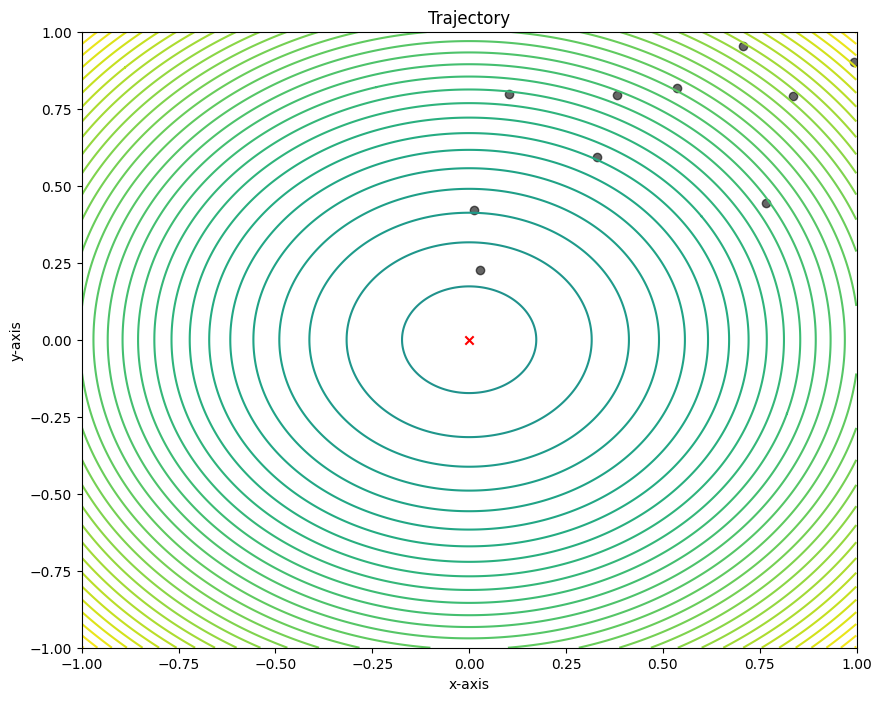

In [54]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters.plotters import plot_contour
from pyswarms.utils.plotters.formatters import Mesher

options = {"c1": 0.5, "c2": 0.3, "w": 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=50)
# tworzenie animacji
m = Mesher(func=fx.sphere)
animation = plot_contour(pos_history=optimizer.pos_history, mesher=m, mark=(0, 0))
animation.save("plot0.gif", writer="imagemagick", fps=10)

W pewnym zakładzie badawczym inżynierowie próbowali stworzyć bardzo trwały stop
sześciu metali. Ilości wszystkich 6 metali w stopie oznaczone zostały symbolami x, y, z,
u, v, w i są to liczby z przedziału [0, 1). Okazało się, że wytrzymałość stopu określona
jest przez funkcję:

𝑒𝑛𝑑𝑢𝑟𝑎𝑛𝑐𝑒(𝑥, 𝑦, 𝑧, 𝑣, 𝑢, 𝑤) = 𝑒^−2∙(𝑦−sin (𝑥))^2+ sin(𝑧 ∙ 𝑢) + cos (𝑣 ∙ 𝑤)

def endurance(x, y, z, u, v, w):
 return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

Obliczenie maksymalnej wytrzymałości (endurance) było dla inżynierów problematyczne. Poproszono Ciebie, eksperta od sztucznej inteligencji, o rozwiązanie problemu.

Problem ten miał chromosomy zmiennoprzecinkowe (liczby rzeczywiste z przedziału
[0,1)). Rozwiążemy ten problem za pomocą PSO.

## Zadanie 1

Użyjemy paczki pyswarms, by uruchomić algorytm Particle Swarm Optimizer do
wyszukania maksimum funkcji Endurance, z problemu inżynieryjnego.

a) Rzucimy okiem na tutorial o podstawowej optymalizacji:
https://pyswarms.readthedocs.io/en/latest/examples/tutorials/basic_optimization.html#Optimizing-a-function i wykorzystajmy ją na początek do minimalizacji funkcji Sphere.

In [55]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

options = {"c1": 0.5, "c2": 0.3, "w": 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=1000)

2023-10-28 21:31:02,492 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1.02e-47
2023-10-28 21:31:02,840 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0198384094716831e-47, best pos: [3.10545277e-24 7.44679270e-25]


(1.0198384094716831e-47, array([3.10545277e-24, 7.44679270e-25]))

b) Spróbujmy teraz dodać ograniczenia dla dziedziny (obszaru), w którym szukamy
minimum. Trzeba ustalić ograniczenie górne i dolne dla wszystkich zmiennych,
weźmy minimum 1, maksimum 2 – dla wszystkich zmiennych.

In [57]:
x_max = [2, 2]
x_min = [1, 1]
my_bounds = (x_min, x_max)
optimizer = ps.single.GlobalBestPSO(
    n_particles=10, dimensions=2, options=options, bounds=my_bounds
)
optimizer.optimize(fx.sphere, iters=1000)

2023-10-28 21:51:28,434 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.02
2023-10-28 21:51:28,841 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0237987146197067, best pos: [1.00973108 1.00211868]


(2.0237987146197067, array([1.00973108, 1.00211868]))

## Stopy metali

2023-10-28 22:08:40,308 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-3 
2023-10-28 22:08:40,334 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.9999846044633633, best pos: [0.52980653 0.50472911 1.40824948 1.00572374 1.11188244 0.00205749]


Koszt: -2.9999846044633633
Stopy metali: [0.52980653 0.50472911 1.40824948 1.00572374 1.11188244 0.00205749]


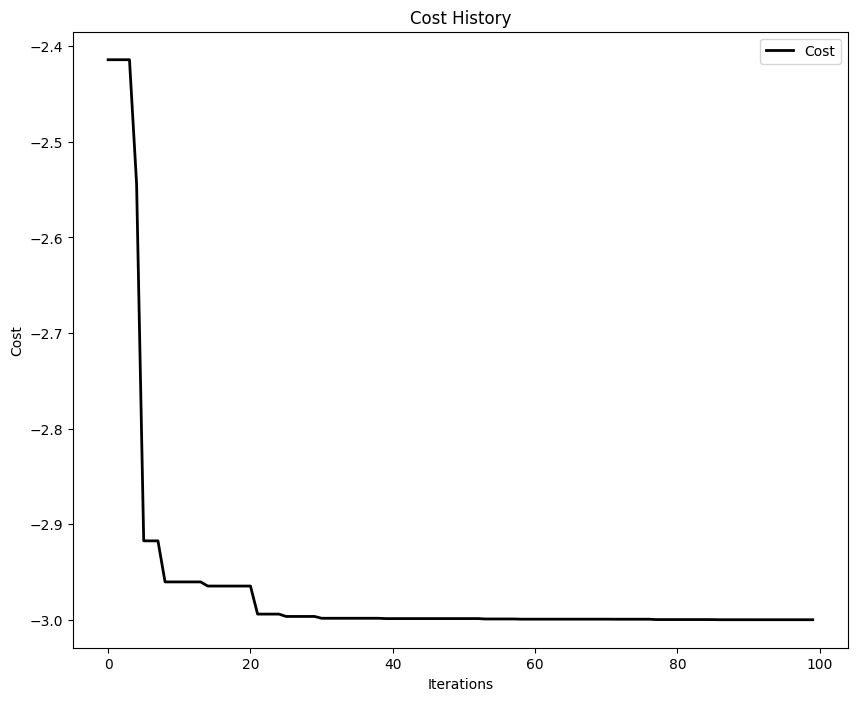

In [65]:
x_max = np.ones(6)
x_min = np.zeros(6)
bounds = (x_min, x_max)

import math


def endurance(x: list[float]):
    return -(
        math.exp(-2 * (x[1] - math.sin(x[0])) ** 2)
        + math.sin(x[2] * x[4])
        + math.cos(x[3] * x[5])
    )

def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

options = {"c1": 0.5, "c2": 0.3, "w": 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options)
cost, pos =  optimizer.optimize(f, iters=100)

print(f"Koszt: {cost}")
print(f"Stopy metali: {pos}")

from pyswarms.utils.plotters.plotters import plot_cost_history
import matplotlib.pyplot as plt

cost_history = optimizer.cost_history

# Plot!
plot_cost_history(cost_history)
plt.show()
